In [ ]:
#Formulate Hypotheses
#Hypothesis 1: The number of electric vehicles (EVs) has increased significantly over time in Washington state.
#Hypothesis 2: The percentage of electric vehicles compared to non-electric vehicles is higher in urban counties than in rural counties within Washington state.

import pandas as pd

# Load the CSV file
file_path = 'C:/repos/group_project_1/Ruby_Project/Electric_Vehicle_Population_Size_History_By_County.csv'
ev_data = pd.read_csv(file_path)

# Convert the 'Date' column to datetime format
ev_data['Date'] = pd.to_datetime(ev_data['Date'])

# Filter data for Washington state
wa_data = ev_data[ev_data['State'] == 'WA']

# Aggregate data by date for Washington state
wa_agg_data = wa_data.groupby('Date').agg({
    'Battery Electric Vehicles (BEVs)': 'sum',
    'Plug-In Hybrid Electric Vehicles (PHEVs)': 'sum',
    'Electric Vehicle (EV) Total': 'sum',
    'Non-Electric Vehicle Total': 'sum',
    'Total Vehicles': 'sum'
}).reset_index()

# Calculate the percentage of electric vehicles in Washington state
wa_agg_data['Percent Electric Vehicles'] = (wa_agg_data['Electric Vehicle (EV) Total'] / wa_agg_data['Total Vehicles']) * 100

In [ ]:
#Hypothesis 1: Increase in EVs Over Time
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Plot the trends of EVs over time
plt.figure(figsize=(8, 4))
sns.lineplot(data=wa_agg_data, x='Date', y='Electric Vehicle (EV) Total', label='EV Total')
plt.title('Trends of Electric Vehicles Over Time in Washington State')
plt.xlabel('Date')
plt.ylabel('Number of Electric Vehicles')
plt.legend()

plt.show()

# Perform linear regression to test the trend
slope, intercept, r_value, p_value, std_err = linregress(wa_agg_data.index, wa_agg_data['Electric Vehicle (EV) Total'])
print(f'Slope: {slope}, Intercept: {intercept}, R-squared: {r_value**2}, P-value: {p_value}')


In [ ]:
# Hypothesis 2: The percentage of electric vehicles compared to non-electric vehicles is higher in urban counties than in rural counties within Washington state.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Load the CSV file
file_path = 'C:/repos/group_project_1/Ruby_Project/Electric_Vehicle_Population_Size_History_By_County.csv'
data = pd.read_csv(file_path)

# Filter data for Washington state
wa_data = ev_data[ev_data['State'] == 'WA']

# Filter the dataset for Washington State and create a copy to avoid the warning
wa_data = data[data['State'] == 'WA'].copy()

# Convert 'Date' column to datetime format using .loc
wa_data.loc[:, 'Date'] = pd.to_datetime(wa_data['Date'])

# Example classification of urban vs rural (You may need actual data for proper classification)
urban_counties = ['King', 'Pierce', 'Snohomish']  # example urban counties
wa_data['Urban'] = wa_data['County'].apply(lambda x: 'Urban' if x in urban_counties else 'Rural')

# Aggregate data by county type
county_type_data = wa_data.groupby(['Date', 'Urban']).agg({
    'Electric Vehicle (EV) Total': 'sum',
    'Non-Electric Vehicle Total': 'sum',
    'Total Vehicles': 'sum'
}).reset_index()

# Calculate the percentage of electric vehicles
county_type_data['Percent Electric Vehicles'] = (county_type_data['Electric Vehicle (EV) Total'] / county_type_data['Total Vehicles']) * 100

# Perform linear regression to test the trend
slope, intercept, r_value, p_value, std_err = linregress(wa_agg_data.index, wa_agg_data['Electric Vehicle (EV) Total'])
print(f'Slope: {slope}, Intercept: {intercept}, R-squared: {r_value**2}, P-value: {p_value}')

# Plot the percentage of electric vehicles by county type over time
plt.figure(figsize=(8, 4))
sns.lineplot(data=county_type_data, x='Date', y='Percent Electric Vehicles', hue='Urban')
plt.title('Percentage of Electric Vehicles Over Time by County Type in Washington State')
plt.xlabel('Date')
plt.ylabel('Percentage of Electric Vehicles')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

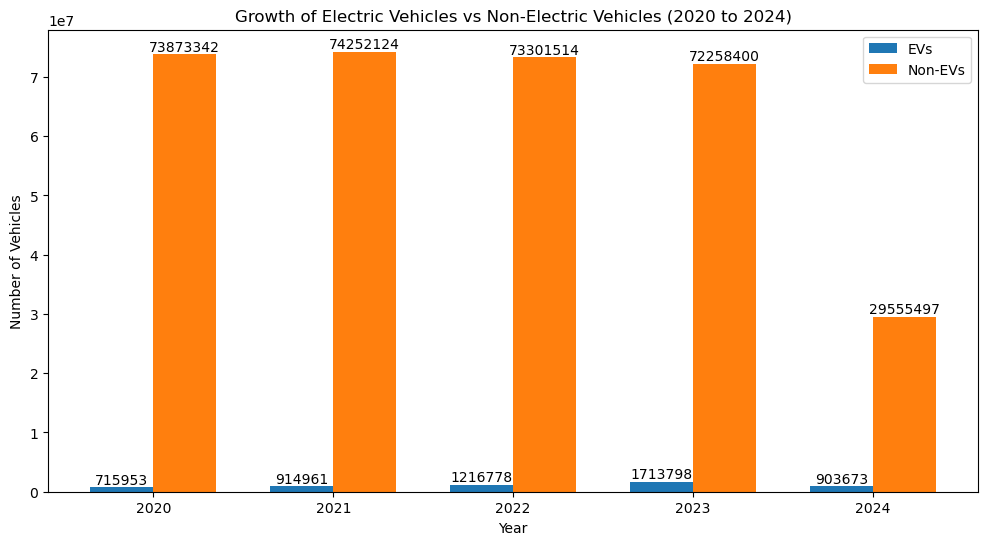

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the new CSV file
file_path = 'C:/repos/group_project_1/Ruby_Project/Electric_Vehicle_Population_Size_History_By_County.csv'
ev_data = pd.read_csv(file_path)

# Convert the 'Date' column to datetime format
ev_data['Date'] = pd.to_datetime(ev_data['Date'], errors='coerce')

# Filter out rows with invalid dates
ev_data = ev_data.dropna(subset=['Date'])

# Extract the year from the 'Date' column
ev_data['Year'] = ev_data['Date'].dt.year

# Filter the dataset for the years 2020 to 2024
filtered_ev_data = ev_data[(ev_data['Year'] >= 2020) & (ev_data['Year'] <= 2024)]

# Aggregate data by year for the filtered range
filtered_annual_ev_data = filtered_ev_data.groupby('Year').agg({
    'Electric Vehicle (EV) Total': 'sum',
    'Non-Electric Vehicle Total': 'sum'
}).reset_index()

# Plotting the bar chart with numbers on the bars
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = filtered_annual_ev_data['Year']

bar1 = plt.bar(index, filtered_annual_ev_data['Electric Vehicle (EV) Total'], bar_width, label='EVs')
bar2 = plt.bar(index + bar_width, filtered_annual_ev_data['Non-Electric Vehicle Total'], bar_width, label='Non-EVs')

# Adding numbers on the bars
for i, value in enumerate(filtered_annual_ev_data['Electric Vehicle (EV) Total']):
    plt.text(index[i], value, f'{value}', ha='center', va='bottom')

for i, value in enumerate(filtered_annual_ev_data['Non-Electric Vehicle Total']):
    plt.text(index[i] + bar_width, value, f'{value}', ha='center', va='bottom')

plt.xlabel('Year')
plt.ylabel('Number of Vehicles')
plt.title('Growth of Electric Vehicles vs Non-Electric Vehicles (2020 to 2024)')
plt.xticks(index + bar_width / 2, index)
plt.legend()

plt.show()
